In [1]:
# This is fucking useless.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xgboost import XGBClassifier

from dataPreprocessing import dataPreprocessing

Using TensorFlow backend.


In [33]:
# Loading and preprocessing data.
dataset = pd.read_csv('data/application_train.csv', index_col=0)

dataset = dataPreprocessing(parametric_model=False, remove_na_values=True).preprocess(dataset)

train = dataset
X = train.drop('TARGET_1', axis=1)
y = train['TARGET_1']

In [34]:
# Train-test split (for shits and giggles).
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [35]:
# Fitting the model.
classifier = XGBClassifier()
classifier.fit(X_train.values, y_train.values)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [23]:
# Tree (needs graphviz. fuck this).
#from xgboost import plot_tree
#plot_tree(classifier)

In [36]:
# Making predictions
y_pred = classifier.predict(X_test.values)

E:\Anaconda3-5.2.0\envs\data_science_old\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


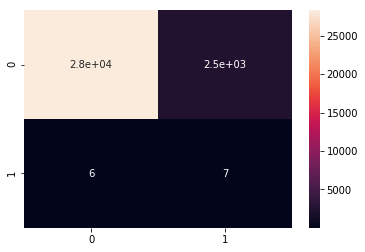

In [37]:
# Confusion matrix.
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(y_pred, y_test.values)
sn.heatmap(cm, annot=True) # Ugly af.

ROC AUC  0.5013161453128527


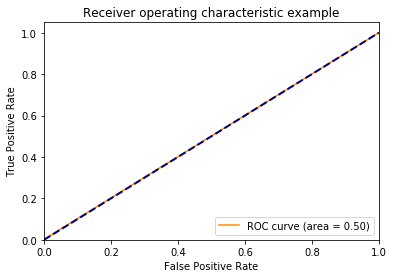

In [38]:
# ROC AUC.
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC AUC ", roc_auc)

lw = 2
plt.plot(false_positive_rate, true_positive_rate, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")